# EXAMEN FINAL - Probabilidad y Estadística para la Inteligencia Artificial

## Integrantes:
- Emiliano Uriel Martino
- Carolina Perez Omodeo
- Diego José Araujo Arellano

# Consigna

Don Francisco es un pequeño comerciante de barrio con más de 40 años de experiencia en su negocio. Gracias a su esfuerzo,
don Francisco cuenta hoy con dos supermercados de barrio, con los que sostiene su familia: El supermercado ’Santa Ana’ y el
supermercado ’La Floresta’.
Uno de sus hijos, Matías, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le
propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que a
don Francisco le parece buena idea y le plantea algunas inquietudes:
1. Don Francisco necesita saber en qué mes se puede tomar unas vacaciones. También necesita saber en qué mes las ventas
serán mejoras para embarcarse en una inversión importante. Por ello le pregunta a Matías, ¿cómo se comportan las
ventas en cada mes?
2. De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atención de sus supermercados a lo
largo de la semana; también debe decidir en qué días debe contratar más empleados y en qué días podría contratar
menos. Por ello pregunta, ¿cómo se comportan las ventas en cada día de la semana?
3. Don Francisco está un poco preocupado porque tiene la impresión de que la tienda ’La Floresta’ vende menos que la
tienda ’Santa Ana’.

Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. Con
esta información, Matías construye sendas tablas por cada tienda en unas hojas de cálculo, en las cuales la primera columna
corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la
inflación. Matías no se siente muy seguro de la tarea a realizar, así que les pide ayuda a ustedes para abordar el problema.

1. (3.5 puntos) Determinen funciones empíricas de distribución para las ventas en ambas tiendas durante cada uno de
los meses del año. Determinen también aproximaciones a las funciones de densidad para las distribuciones anteriores.
Determine intervalos de confianza empíricos para cada mes, para significancias del 95% y el 99 %.
2. (3.5 puntos) Determine funciones empíricas de distribución para las ventas en ambas tiendas por cada día de la semana.
Establezcan aproximaciones a las funciones de densidad para las distribuciones anteriores. Establezcan también intervalos
de confianza empíricos para cada día de la semana, para significancias del 95% y el 99 %.
3. (3 puntos) Realicen pruebas de hipótesis, con base en los datos, para aceptar o rechazar la intuición de Don Francisco,
con significancias de 95% y 99 %.

Deben realizar un informe en un documento pdf, en donde queden claros los siguientes aspectos:

1. Planteamiento de los problemas de investigación
2. Procesamiento realizado a los datos
3. Resultados encontrados
4. Análisis y conclusiones

# Resolución



In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

#### Procesamiento de los datos


In [243]:
 # ---------------- Carga de datos ----------------

datos = pd.read_excel('Grupo_8.xlsx', sheet_name=None)

# ---------------- Series dataset ----------------

santa_ana = datos['Santa Ana']
la_floresta = datos['La Floresta']

# ---------------- Formato fecha ----------------

santa_ana['Fecha'] = pd.to_datetime(santa_ana['Fecha'])
la_floresta['Fecha'] = pd.to_datetime(la_floresta['Fecha'])

# ---------------- Categoria: MES ----------------

santa_ana['Mes'] = santa_ana['Fecha'].dt.month
la_floresta['Mes'] = la_floresta['Fecha'].dt.month

santa_ana['NombreMes'] = santa_ana['Fecha'].dt.month_name()
la_floresta['NombreMes'] = la_floresta['Fecha'].dt.month_name()

# ---------------- Categoria: DIA ----------------

santa_ana['DiaSemana'] = santa_ana['Fecha'].dt.day_of_week
la_floresta['DiaSemana'] = la_floresta['Fecha'].dt.day_of_week

santa_ana['NombreDiaSemana'] = santa_ana['Fecha'].dt.day_name()
la_floresta['NombreDiaSemana'] = la_floresta['Fecha'].dt.day_name()

# ---------------- Ventas totales ----------------

ventas_mensuales_santa_ana = santa_ana.groupby('Mes')['Ventas'].sum()
ventas_mensuales_la_floresta = la_floresta.groupby('Mes')['Ventas'].sum()

ventas_diarias_santa_ana = santa_ana.groupby('DiaSemana')['Ventas'].sum()
ventas_diarias_la_floresta = la_floresta.groupby('DiaSemana')['Ventas'].sum()

# ---------------- Información auxiliar ----------------

mes_orden = ["","Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Setiembre","Octubre","Noviembre","Diciembre"]
dias_orden = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

santa_ana.head()


,Fecha,Ventas,Mes,NombreMes,DiaSemana,NombreDiaSemana
0,2023-01-01,12831.604642,1,January,6,Sunday
1,2023-01-02,17083.736169,1,January,0,Monday
2,2023-01-03,18958.121758,1,January,1,Tuesday
3,2023-01-04,19369.824856,1,January,2,Wednesday
4,2023-01-05,18049.720308,1,January,3,Thursday


#### Parte 1 - Ventas Mensuales



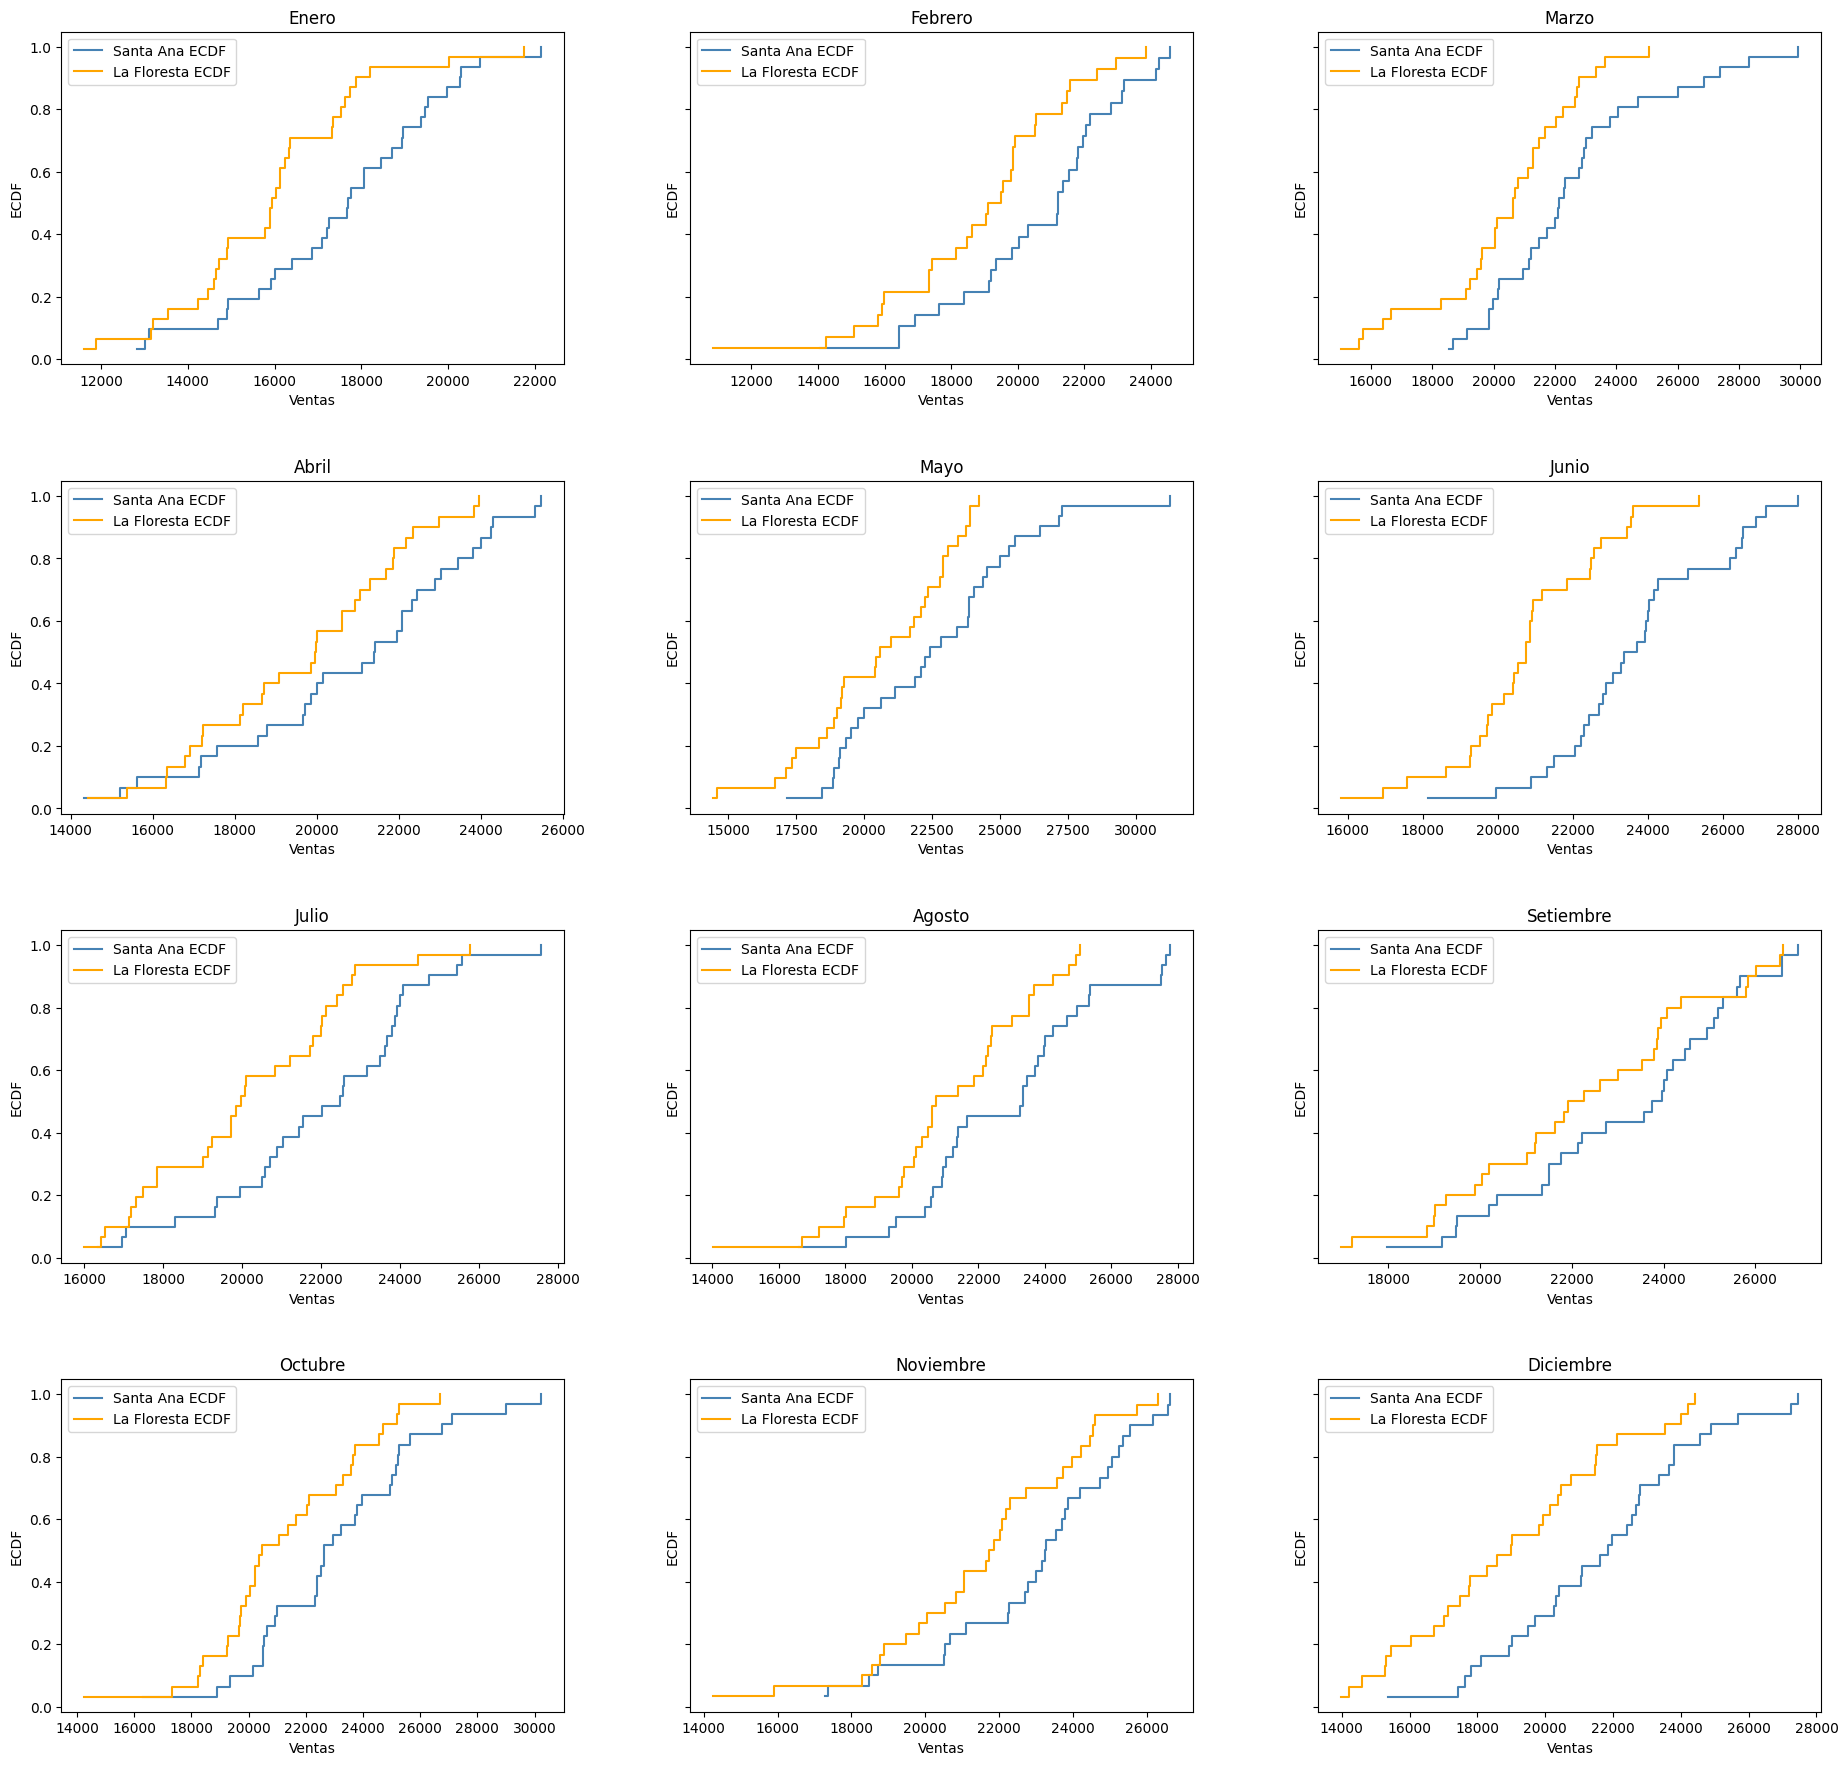

In [244]:
#  Función de distribución empírica 

def ecdf(data):
    
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, yvals

def plot_monthly_distributions(data1, tienda1, data2, tienda2):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)
    axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

    for month in np.unique(data1['Mes']): 
        ax = axes[month-1]
        
        monthly_data1 = data1[data1['Mes'] == month]['Ventas']
        monthly_data2 = data2[data2['Mes'] == month]['Ventas']
        
        sorted_data1, ecdf1 = ecdf(monthly_data1)
        ax.plot(sorted_data1, ecdf1, label=f'{tienda1} ECDF', color="steelblue", drawstyle='steps-post')
        
        sorted_data2, ecdf2 = ecdf(monthly_data2)
        ax.plot(sorted_data2, ecdf2, label=f'{tienda2} ECDF', color="orange", drawstyle='steps-post')

        ax.set_title(f'{mes_orden[month]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('ECDF')
        ax.legend(loc='upper left')  

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.35, wspace=0.25)
    plt.show()

# Graficar para Santa Ana y La Floresta
plot_monthly_distributions(santa_ana, 'Santa Ana', la_floresta, 'La Floresta')

In [245]:
'''# Histogramas | KDE por separado para cada serie

def plot_monthly_distributions(data, tienda, vcolor = ["skyblue","orange"]):
    fig, axes = plt.subplots(4, 3, figsize=(20, 15), sharey=True)
    axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

    for month in np.unique(data['Mes']):  # Suponiendo 12 meses
        monthly_data = data[data['Mes'] == month]['Ventas']
        if len(monthly_data) > 0:
            data_sorted = np.sort(monthly_data)
            kde = gaussian_kde(monthly_data)
            density = kde(data_sorted)

            ax = axes[month-1]
            ax.hist(monthly_data, bins=20, density=True, alpha=0.5, label='Histograma', color=vcolor[0])
            ax.plot(data_sorted, density, label='KDE', color=vcolor[1])
            ax.set_title(f'{tienda} - Mes {mes_orden[month]}')
            ax.set_xlabel('Ventas')
            ax.set_ylabel('Densidad')
            ax.legend(loc='upper right')  # Coloca la leyenda en la mejor posición

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.5, wspace=0.25)
    plt.show()

# Gráfico Santa Ana
plot_monthly_distributions(santa_ana, 'Santa Ana')

# Gráfico La Floresta
plot_monthly_distributions(la_floresta, 'La Floresta', vcolor = ["gold","green"])'''

'# Histogramas | KDE por separado para cada serie\n\ndef plot_monthly_distributions(data, tienda, vcolor = ["skyblue","orange"]):\n    fig, axes = plt.subplots(4, 3, figsize=(20, 15), sharey=True)\n    axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso\n\n    for month in np.unique(data[\'Mes\']):  # Suponiendo 12 meses\n        monthly_data = data[data[\'Mes\'] == month][\'Ventas\']\n        if len(monthly_data) > 0:\n            data_sorted = np.sort(monthly_data)\n            kde = gaussian_kde(monthly_data)\n            density = kde(data_sorted)\n\n            ax = axes[month-1]\n            ax.hist(monthly_data, bins=20, density=True, alpha=0.5, label=\'Histograma\', color=vcolor[0])\n            ax.plot(data_sorted, density, label=\'KDE\', color=vcolor[1])\n            ax.set_title(f\'{tienda} - Mes {mes_orden[month]}\')\n            ax.set_xlabel(\'Ventas\')\n            ax.set_ylabel(\'Densidad\')\n            ax.legend(loc=\'upper right\')  # Coloca la ley

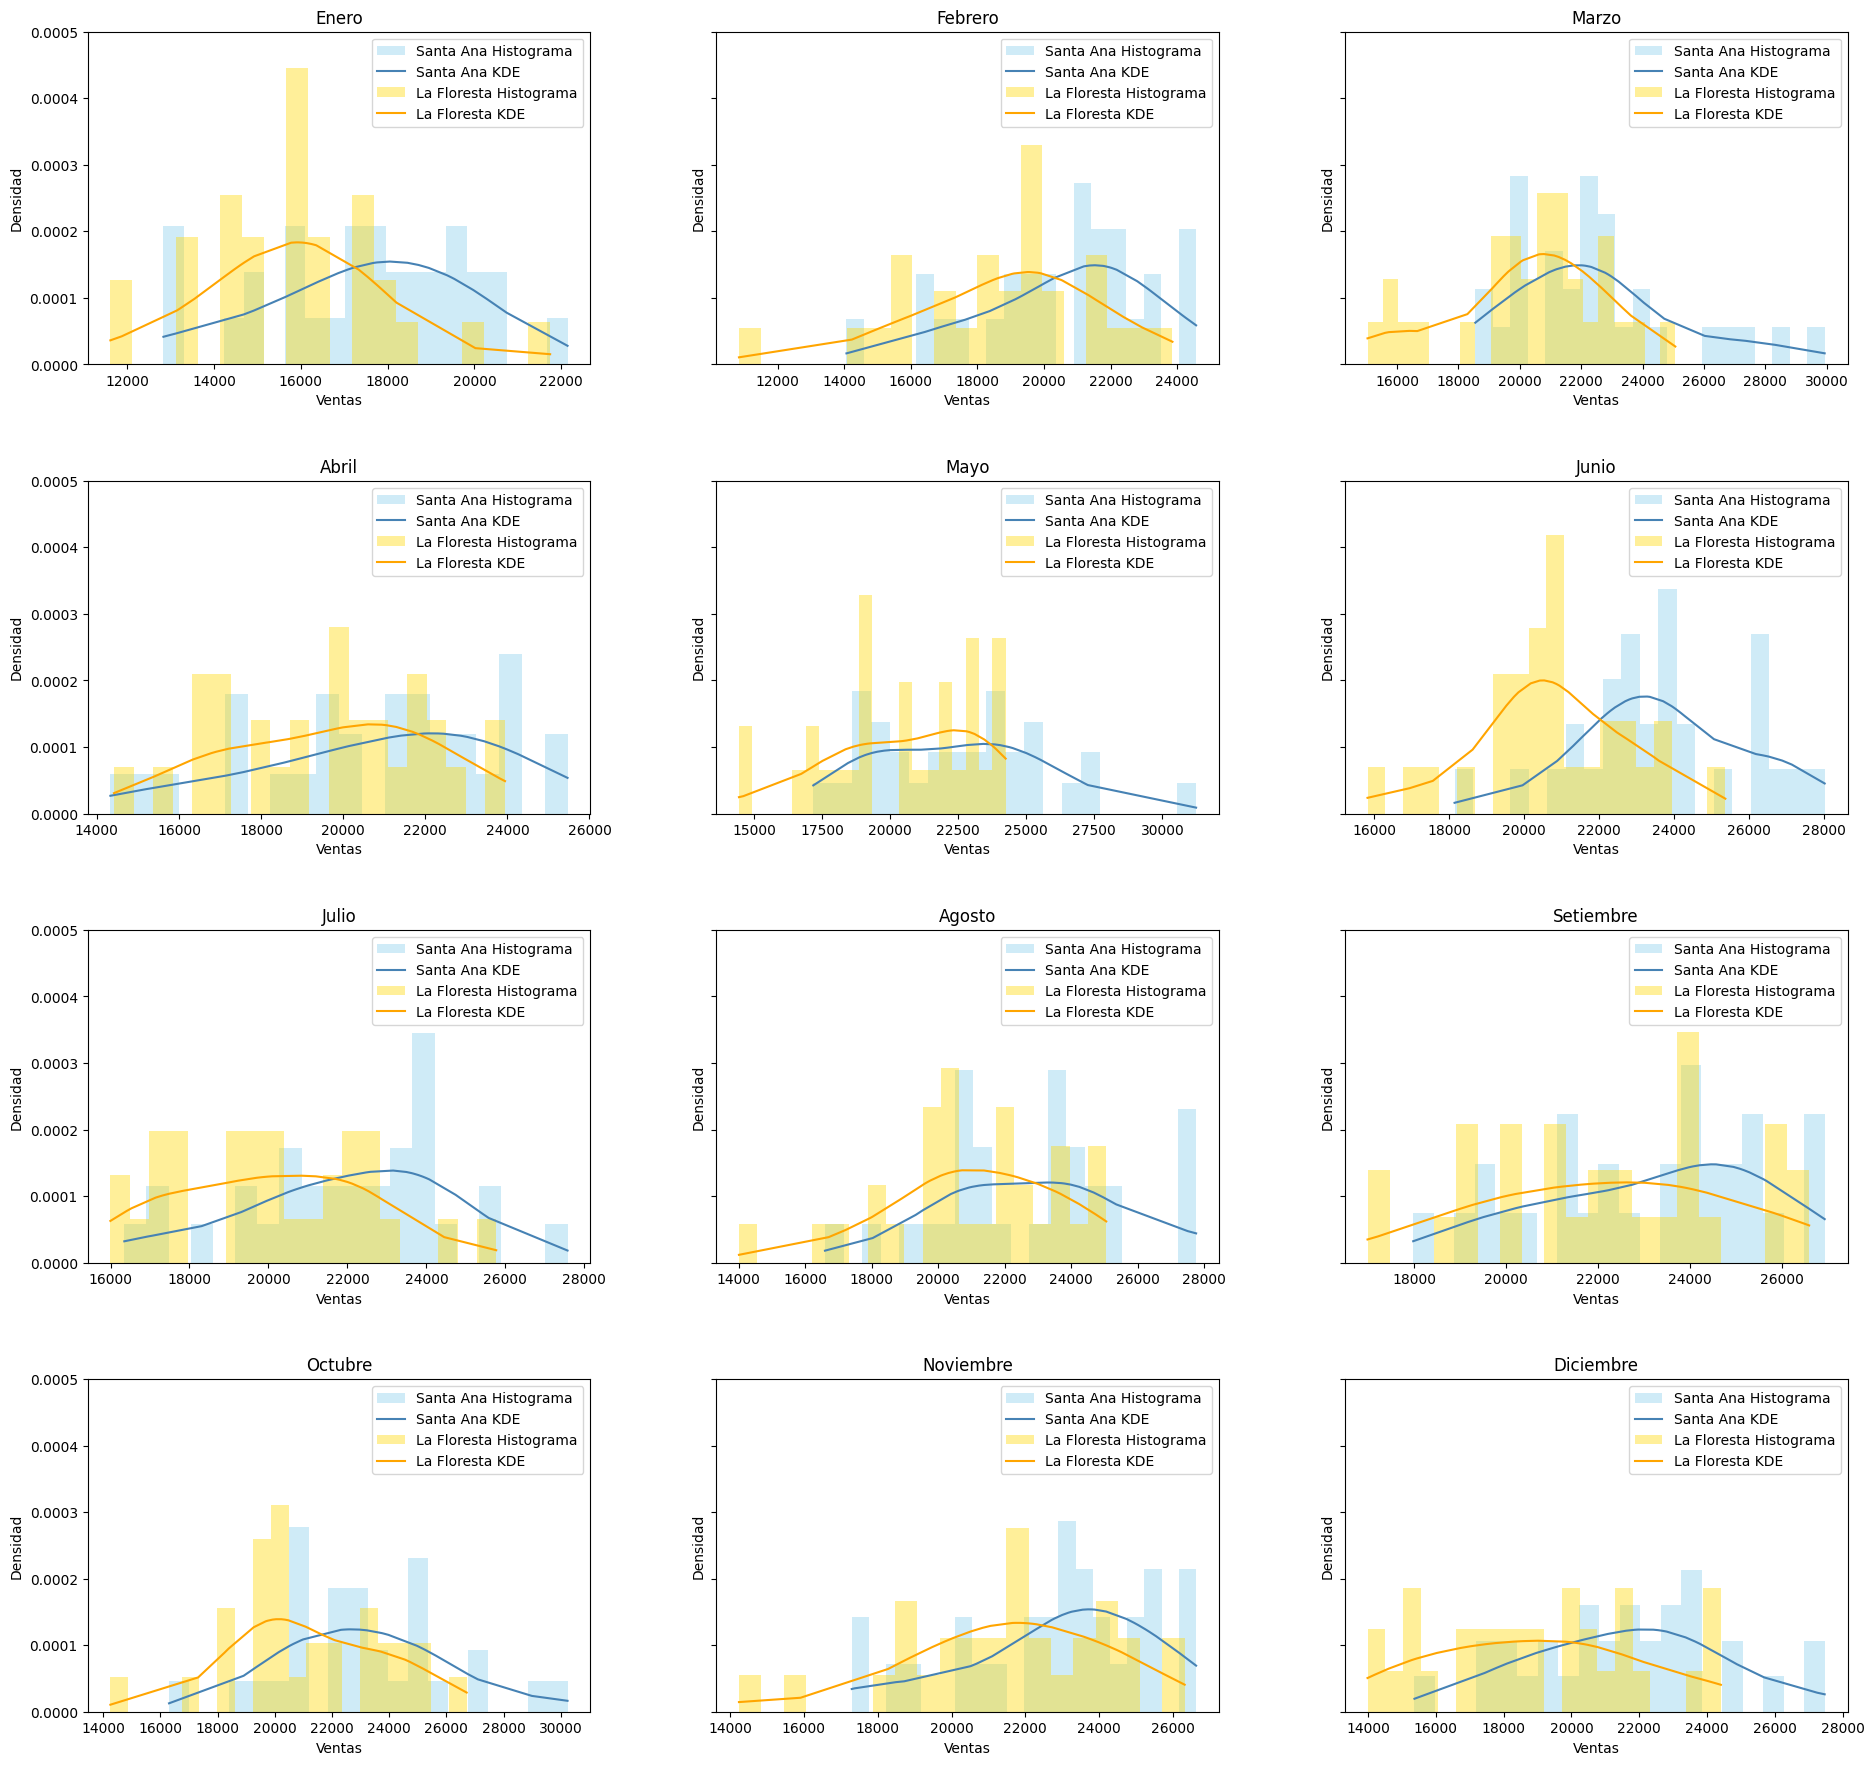

In [246]:
# ---------------- Aproximaciones a funciones de densidad : Histogramas | KDE ----------------

def plot_monthly_distributions(data1, tienda1, data2, tienda2):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)
    axes = axes.flatten() 

    for month in np.unique(data1['Mes']): 
        ax = axes[month-1]
        
        monthly_data1 = data1[data1['Mes'] == month]['Ventas']
        monthly_data2 = data2[data2['Mes'] == month]['Ventas']
        
        if len(monthly_data1) > 0:
            data_sorted1 = np.sort(monthly_data1)
            kde1 = gaussian_kde(monthly_data1)
            density1 = kde1(data_sorted1)
            ax.hist(monthly_data1, bins=20, density=True, alpha=0.4, label=f'{tienda1} Histograma', color="skyblue")
            ax.plot(data_sorted1, density1, label=f'{tienda1} KDE', color="steelblue")

        if len(monthly_data2) > 0:
            data_sorted2 = np.sort(monthly_data2)
            kde2 = gaussian_kde(monthly_data2)
            density2 = kde2(data_sorted2)
            ax.hist(monthly_data2, bins=20, density=True, alpha=0.4, label=f'{tienda2} Histograma', color="gold")
            ax.plot(data_sorted2, density2, label=f'{tienda2} KDE', color="orange")

        ax.set_ylim([0, 0.0005]) 
        ax.set_title(f'{mes_orden[month]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Densidad')
        ax.legend(loc='upper right')  

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.35, wspace=0.25)
    plt.show()

# Graficar para Santa Ana y La Floresta
plot_monthly_distributions(santa_ana, 'Santa Ana', la_floresta, 'La Floresta')

In [247]:
# Función paca calcular intervalos de confianza empíricos

def confidence_intervals(data):
    results = {}
    for month in data['Mes']:
        monthly_sales = data[data['Mes'] == month]['Ventas']
        
        # Confidence intervals
        ci_95 = np.round(np.percentile(monthly_sales, [2.5, 97.5]),2)
        ci_99 = np.round(np.percentile(monthly_sales, [0.5, 99.5]),2)
        
        results[month] = {
            'ci_95': ci_95,
            'ci_99': ci_99
        }
    return results


In [248]:

# Intervalos de confianza para SANTA ANA

results_santa_ana = confidence_intervals(santa_ana)

# Diccionario para guardar los intervalos de cada tienda por mes
intervals_santa_ana = {'Month': [], 'CI_95_Lower': [], 'CI_95_Upper': [], 'CI_99_Lower': [], 'CI_99_Upper': []}

for month in np.unique(santa_ana['Mes']):

    ci_95_santa_ana = results_santa_ana[month]['ci_95']
    ci_99_santa_ana = results_santa_ana[month]['ci_99']
    
    intervals_santa_ana['Month'].append(month)
    intervals_santa_ana['CI_95_Lower'].append(ci_95_santa_ana[0])
    intervals_santa_ana['CI_95_Upper'].append(ci_95_santa_ana[1])
    intervals_santa_ana['CI_99_Lower'].append(ci_99_santa_ana[0])
    intervals_santa_ana['CI_99_Upper'].append(ci_99_santa_ana[1])

# Dataframes | Ajustes
df_intervals_santa_ana = pd.DataFrame(intervals_santa_ana); 
df_intervals_santa_ana.columns = ['Mes','CI 95% Inferior','CI 95% Superior','CI 99% Inferior','CI 99% Superior']
df_intervals_santa_ana['Mes'] = mes_orden[1:13]

df_intervals_santa_ana


,Mes,CI 95% Inferior,CI 95% Superior,CI 99% Inferior,CI 99% Superior
0,Enero,12966.96,21094.47,12858.68,21936.69
1,Febrero,15658.48,24351.12,14383.86,24525.22
2,Marzo,18643.34,28726.12,18567.95,29693.17
3,Abril,14962.79,25352.21,14456.66,25442.60
4,Mayo,18127.39,28255.67,17361.76,30641.78
5,Junio,19461.68,27388.69,18409.28,27896.23
6,Julio,16798.73,26075.44,16439.19,27273.67
7,Agosto,17671.70,27669.70,16810.46,27741.43
8,Setiembre,18836.97,26682.64,18144.83,26887.15
9,Octubre,18257.00,29300.59,16692.47,30048.04


In [249]:
# Intervalos de confianza para LA FLORESTA

results_la_floresta = confidence_intervals(la_floresta)

# Diccionario para guardar los intervalos de cada tienda por mes
intervals_la_floresta = {'Month': [], 'CI_95_Lower': [], 'CI_95_Upper': [], 'CI_99_Lower': [], 'CI_99_Upper': []}

for month in np.unique(la_floresta['Mes']):

    ci_95_la_floresta = results_la_floresta[month]['ci_95']
    ci_99_la_floresta= results_la_floresta[month]['ci_99']
    
    intervals_la_floresta['Month'].append(month)
    intervals_la_floresta['CI_95_Lower'].append(ci_95_la_floresta[0])
    intervals_la_floresta['CI_95_Upper'].append(ci_95_la_floresta[1])
    intervals_la_floresta['CI_99_Lower'].append(ci_99_la_floresta[0])
    intervals_la_floresta['CI_99_Upper'].append(ci_99_la_floresta[1])

# Dataframes | Ajustes
df_intervals_la_floresta = pd.DataFrame(intervals_la_floresta); 
df_intervals_la_floresta.columns = ['Mes','CI 95% Inferior','CI 95% Superior','CI 99% Inferior','CI 99% Superior']
df_intervals_la_floresta['Mes'] = mes_orden[1:13]

df_intervals_la_floresta


,Mes,CI 95% Inferior,CI 95% Superior,CI 99% Inferior,CI 99% Superior
0,Enero,11805.81,20453.84,11648.09,21487.80
1,Febrero,13125.05,23239.60,11293.67,23734.39
2,Marzo,15464.23,23983.81,15121.79,24850.93
3,Abril,15119.73,23852.48,14557.57,23924.76
4,Mayo,14559.43,23976.40,14462.93,24187.31
5,Junio,16637.22,24087.44,15986.10,25115.15
6,Julio,16308.21,24780.30,16059.07,25570.15
7,Agosto,16030.52,24970.55,14411.80,25039.06
8,Setiembre,17139.86,26546.79,17009.20,26589.23
9,Octubre,16551.36,25611.66,14710.49,26488.12


#### Parte 2 - Ventas Dias de la Semana

In [250]:
# Paso 2: Agrupar las ventas por día de la semana
santa_ana['DiaSemana'] = santa_ana['Fecha'].dt.day_name()
la_floresta['DiaSemana'] = la_floresta['Fecha'].dt.day_name()

#### Parte 3 - Pruebas de hipótesis